In [1]:
from prose.datasets import generate_prose_reduction_datatset

generate_prose_reduction_datatset("moving_object_dataset", moving=[5, [0,40], [75, 60]], n_images=15)

'/Users/lionelgarcia/Code/prose/docs/source/tutorials/modular-reduction/moving_object_dataset'

In [2]:
from prose import FitsManager

fm = FitsManager("moving_object_dataset")

100%|██████████| 20/20 [00:00<00:00, 139.39it/s]


In [5]:
from prose import Unit
from prose.blocks import Gif

u = Unit([
    Gif("moving_dataset_movie.gif", factor=2),
], "default", fm)

u.run()

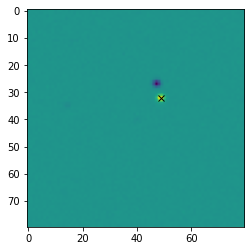

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# loading first and second images
files = fm.get("light")
im0 = fits.getdata(files[5])
im1 = fits.getdata(files[6])

# difference image
im_diff = im1 - im0

# max diff
position = np.array(np.unravel_index(np.argmax(im_diff), im_diff.shape))[::-1]

plt.imshow(im_diff)
plt.plot(*position, "x", c="k")
plt.savefig("diff_im_principle.png", dpi=200)

In [12]:
from prose import Block
from prose.utils import z_scale

class MovingTarget(Block):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.last_image = None
        self.positions = []
        
    def run(self, image):
        if self.last_image is None:
            self.positions.append(None)
        else:
            im_diff = image.data - self.last_image
            position = np.unravel_index(np.argmax(im_diff), im_diff.shape)[::-1]
            self.positions.append(position)
        self.last_image = image.data
        
    def terminate(self):
        plt.imshow(z_scale(self.last_image), cmap="Greys_r")
        coords_path = np.array(self.positions[1::])
        plt.plot(*coords_path.T, "-o", ms=4)

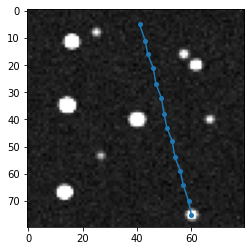

In [14]:
from prose import Unit

pipeline = Unit([
    MovingTarget()
], "moving", fm)

pipeline.run()
plt.savefig("result.png", dpi=200)